In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [5]:
mush=pd.read_csv('mushrooms.csv')

In [6]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [11]:
mush.columns=mush.columns.str.replace('-', ' ')

In [8]:
mush.shape

(8124, 23)

In [12]:
mush.columns

Index(['class', 'cap shape', 'cap surface', 'cap color', 'bruises', 'odor', 'gill attachment', 'gill spacing', 'gill size', 'gill color', 'stalk shape', 'stalk root', 'stalk surface above ring', 'stalk surface below ring', 'stalk color above ring', 'stalk color below ring', 'veil type', 'veil color', 'ring number', 'ring type', 'spore print color', 'population', 'habitat'], dtype='object')

In [13]:
mush.dtypes

class                       object
cap shape                   object
cap surface                 object
cap color                   object
bruises                     object
odor                        object
gill attachment             object
gill spacing                object
gill size                   object
gill color                  object
stalk shape                 object
stalk root                  object
stalk surface above ring    object
stalk surface below ring    object
stalk color above ring      object
stalk color below ring      object
veil type                   object
veil color                  object
ring number                 object
ring type                   object
spore print color           object
population                  object
habitat                     object
dtype: object

# Univariate Analysis

In [14]:
col=mush.columns.values
for i in col:
    print(mush[i].value_counts())
    print('\n')
    print('\n')

e    4208
p    3916
Name: class, dtype: int64




x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap shape, dtype: int64




y    3244
s    2556
f    2320
g       4
Name: cap surface, dtype: int64




n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap color, dtype: int64




f    4748
t    3376
Name: bruises, dtype: int64




n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64




f    7914
a     210
Name: gill attachment, dtype: int64




c    6812
w    1312
Name: gill spacing, dtype: int64




b    5612
n    2512
Name: gill size, dtype: int64




b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill color, dtype: int64




t    4608
e    3516
Name: stalk shape, dtype: int64




b    3776
?    2480
e    1120
c     556
r     192
Name: stalk root, dtype: int64




s    517

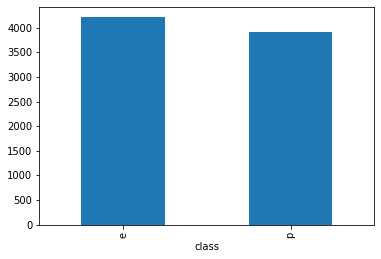

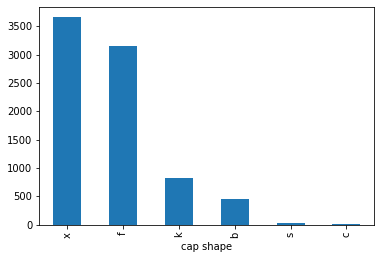

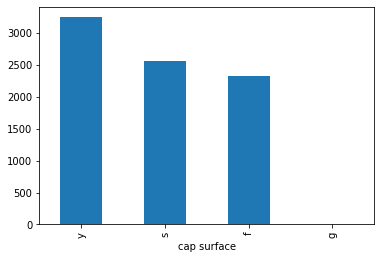

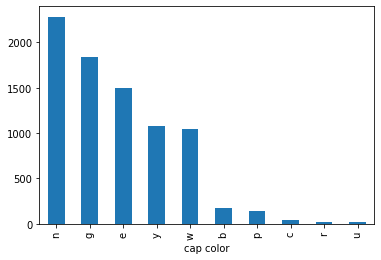

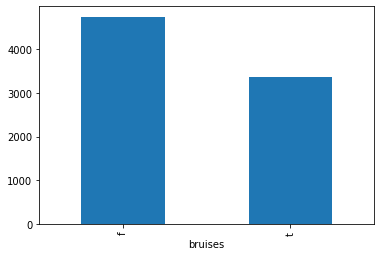

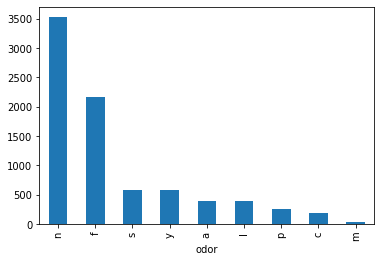

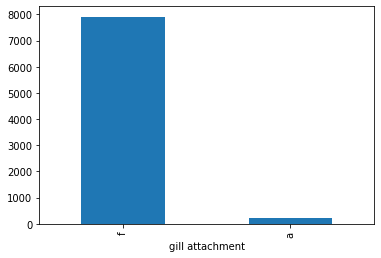

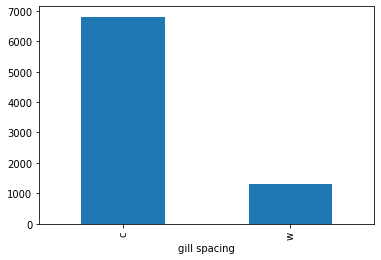

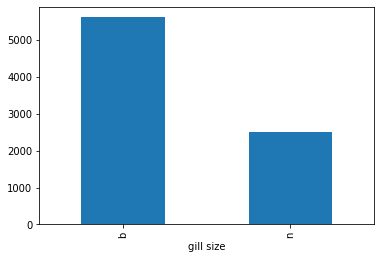

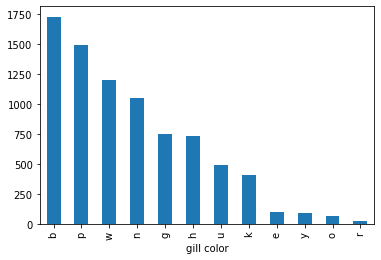

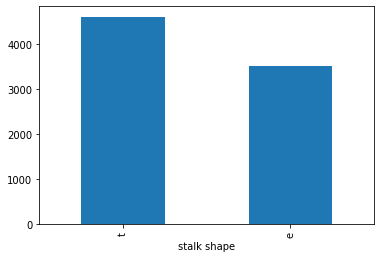

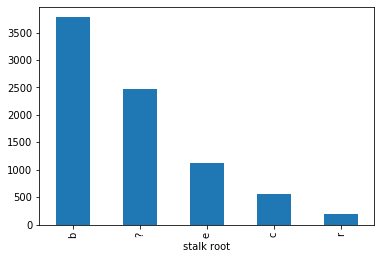

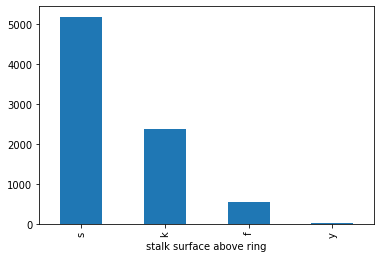

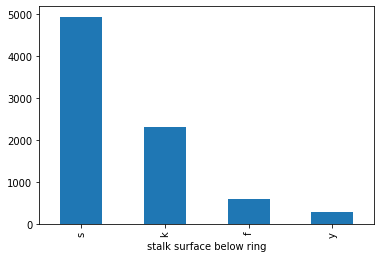

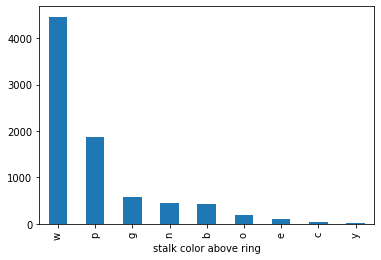

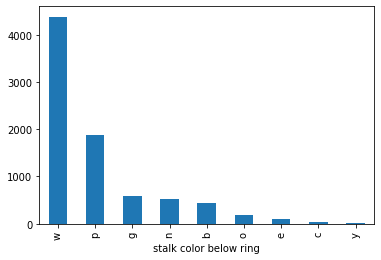

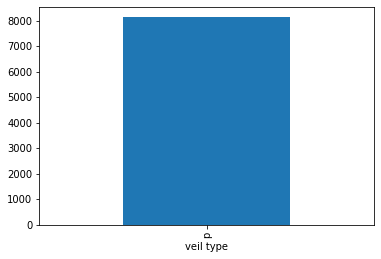

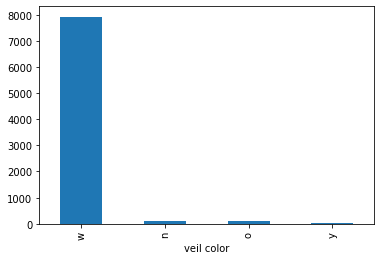

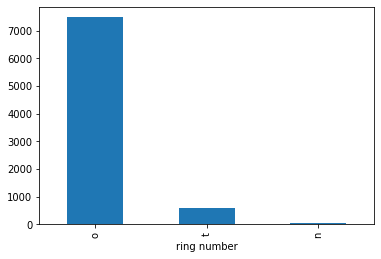

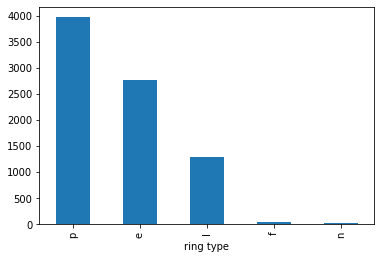

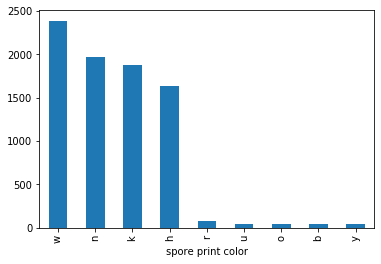

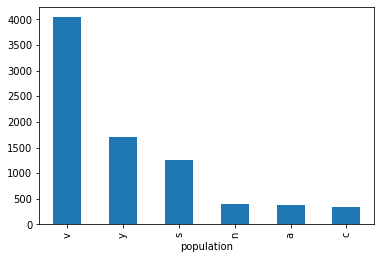

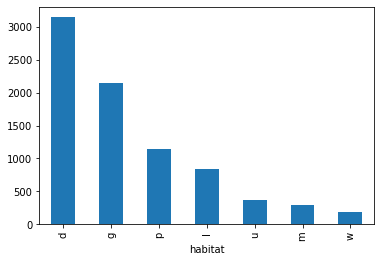

In [16]:
for i in col:
    plt.subplots()
    plt.xlabel(i)
    mush[i].value_counts().plot.bar()

In [17]:
# drop veil type

In [20]:
mush.drop('veil type', axis=1, inplace=True)

In [26]:
col=mush.columns.values
len(col)

22

In [22]:
# label encoding needs to be done to plot distplot and boxplot

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
    mush[i]=le.fit_transform(mush[i])
    # mush=pd.DataFrame(le.fit_transform(mush), columns=col)
mush.head(30)

,class,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil color,ring number,ring type,spore print color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,2,1,4,2,3,3


In [30]:
for i in col:
    print(mush[i].unique())
    print('\n')
    print('\n')

[1 0]




[5 0 4 2 3 1]




[2 3 0 1]




[4 9 8 3 2 5 0 7 1 6]




[1 0]




[6 0 3 5 2 1 8 7 4]




[1 0]




[0 1]




[1 0]




[ 4  5  2  7 10  3  9  1  0  8 11  6]




[0 1]




[3 2 1 4 0]




[2 0 1 3]




[2 0 3 1]




[7 3 6 4 0 2 5 1 8]




[7 6 3 0 4 2 8 5 1]




[2 0 1 3]




[1 2 0]




[4 0 2 1 3]




[2 3 6 1 7 5 4 8 0]




[3 2 0 4 5 1]




[5 1 3 0 4 6 2]






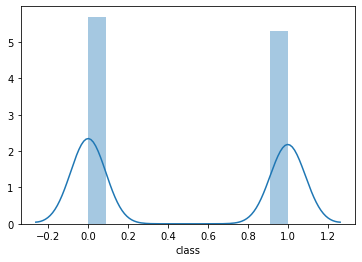

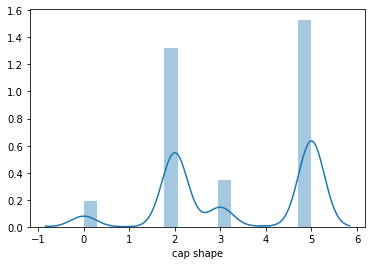

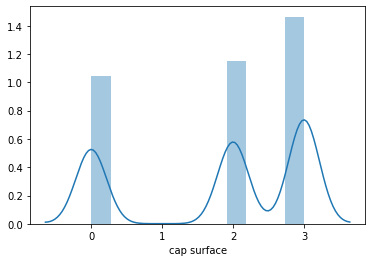

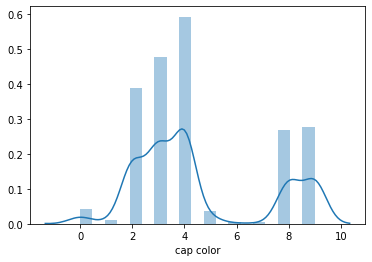

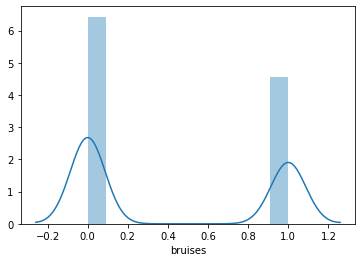

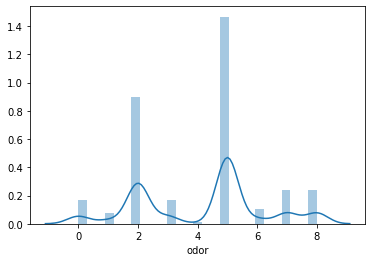

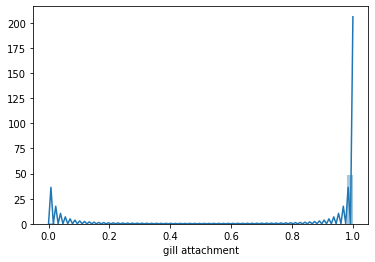

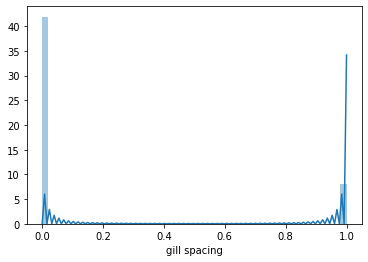

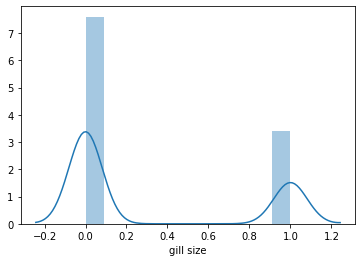

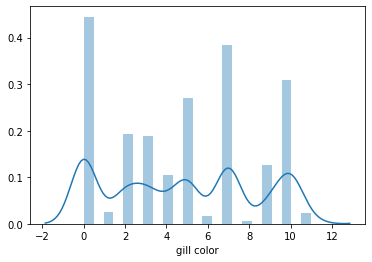

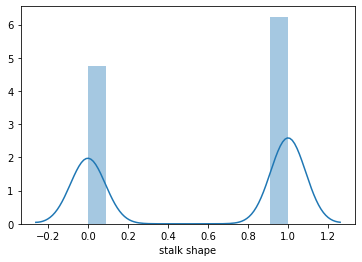

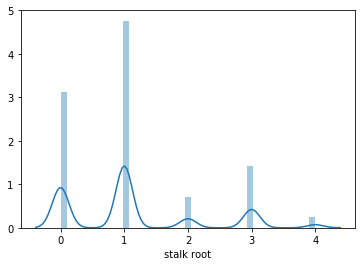

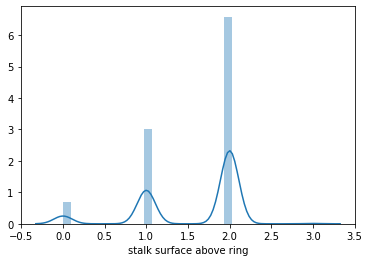

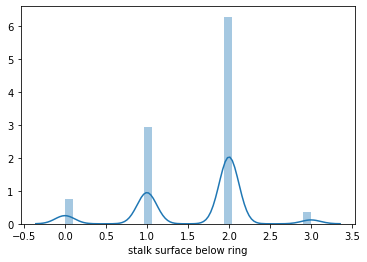

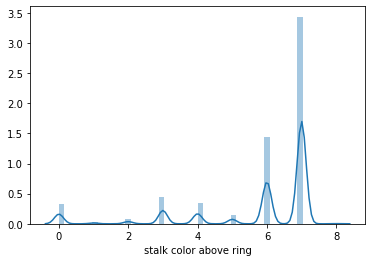

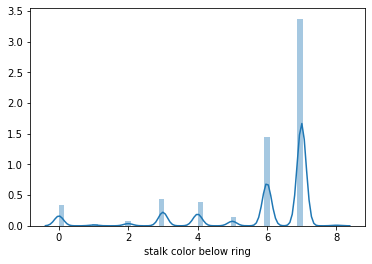

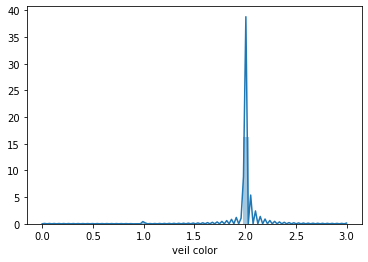

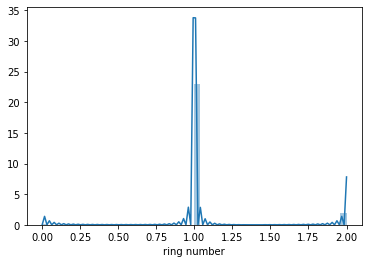

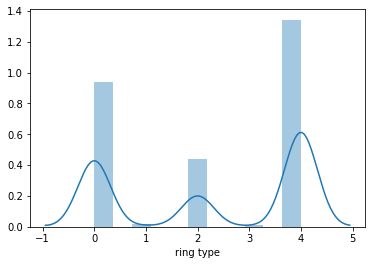

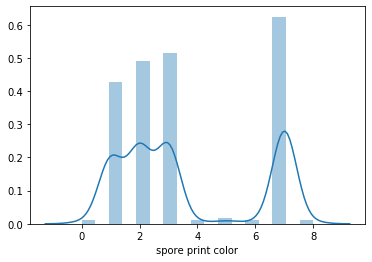

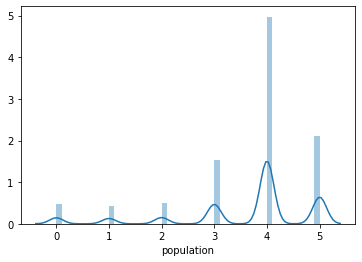

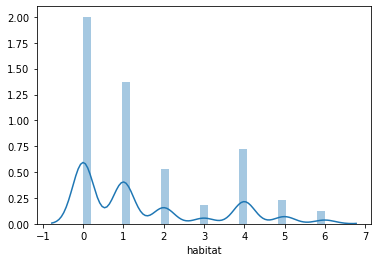

In [31]:
for i in col:
    plt.subplots()
    plt.xlabel(i)
    sns.distplot(mush[i])

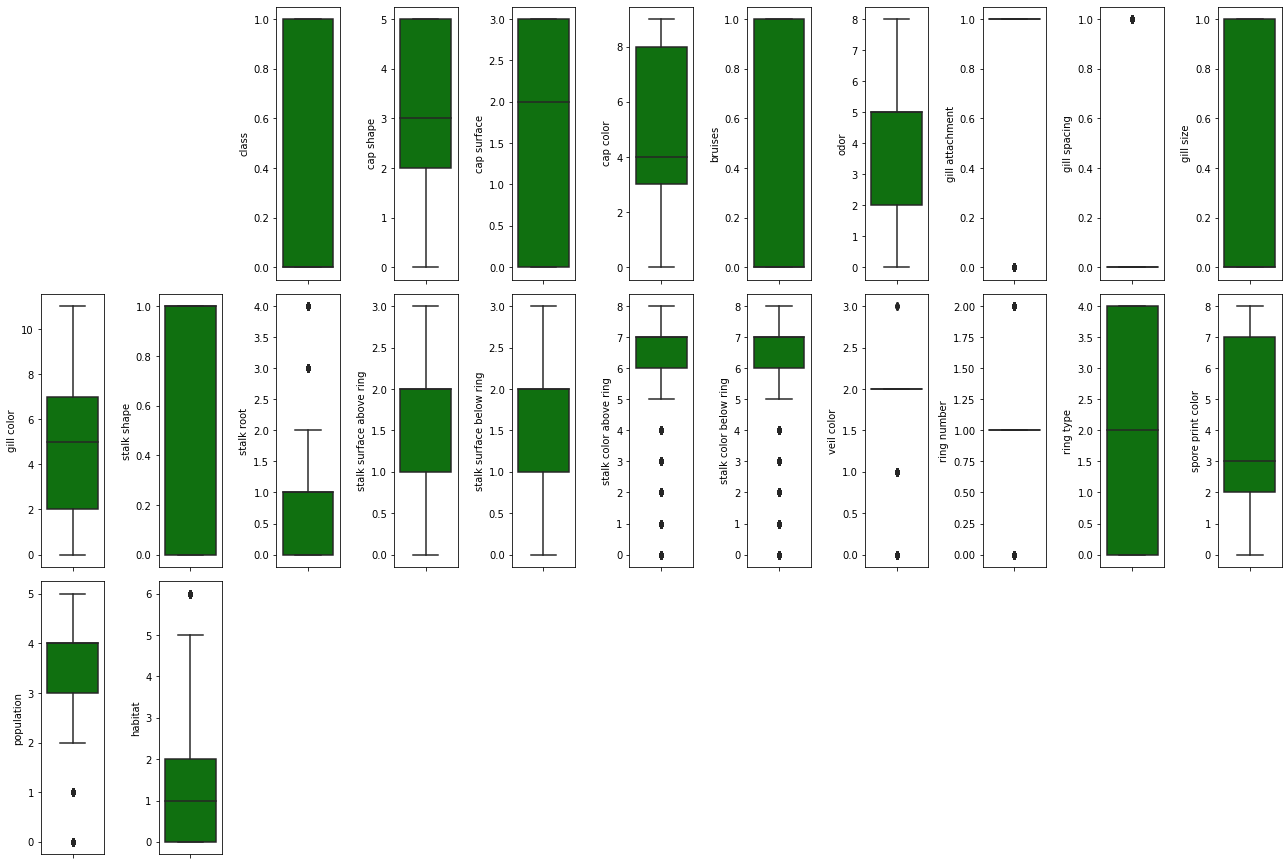

In [36]:
plt.figure(figsize=(18,44))
for i in range(len(col)):
    plt.subplot(11,11,i+3)
    sns.boxplot(mush[col[i]], color='green', orient='v')
    plt.tight_layout()

# Bivariate Analysis

In [38]:
mush.head(2)

,class,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil color,ring number,ring type,spore print color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1


In [37]:
# crosstabs graphs

In [40]:
for i in col:
    print(pd.crosstab(mush['class'], mush[i]))
    print('\n')
    print('\n')

class     0     1
class            
0      4208     0
1         0  3916




cap shape    0  1     2    3   4     5
class                                 
0          404  0  1596  228  32  1948
1           48  4  1556  600   0  1708




cap surface     0  1     2     3
class                           
0            1560  0  1144  1504
1             760  4  1412  1740




cap color    0   1    2     3     4   5   6   7    8    9
class                                                    
0           48  32  624  1032  1264  56  16  16  720  400
1          120  12  876   808  1020  88   0   0  320  672




bruises     0     1
class              
0        1456  2752
1        3292   624




odor     0    1     2    3   4     5    6    7    8
class                                              
0      400    0     0  400   0  3408    0    0    0
1        0  192  2160    0  36   120  256  576  576




gill attachment    0     1
class                     
0                192  4016
1              

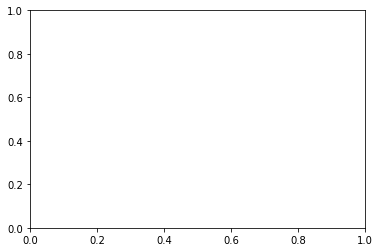

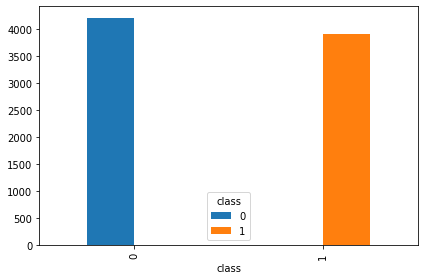

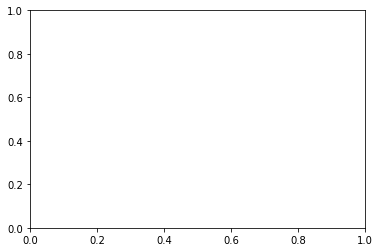

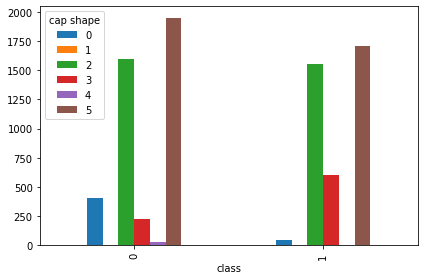

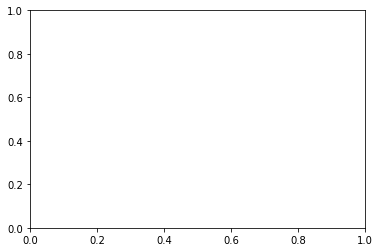

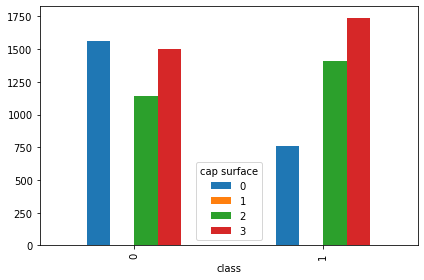

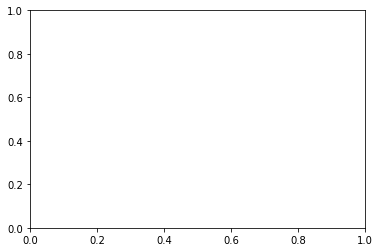

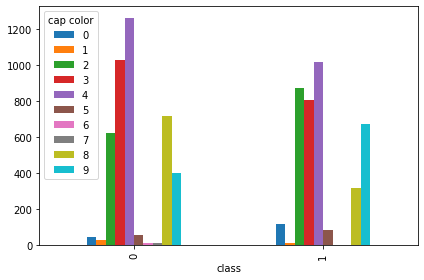

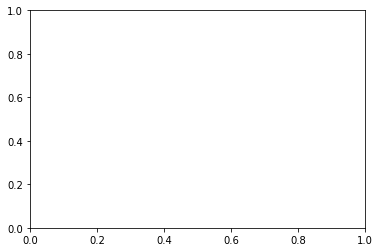

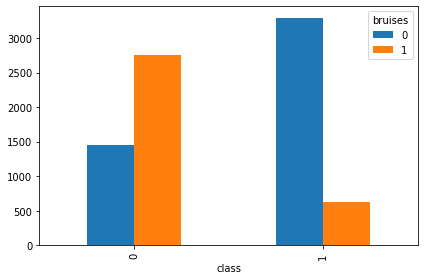

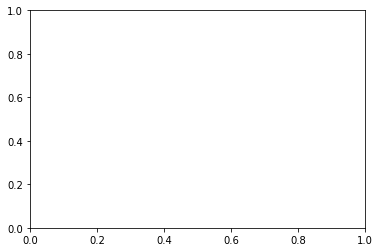

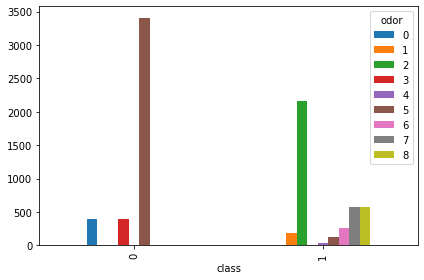

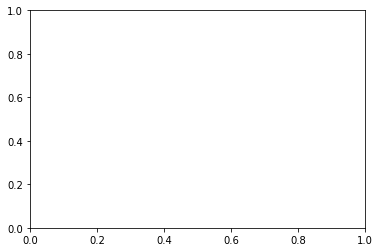

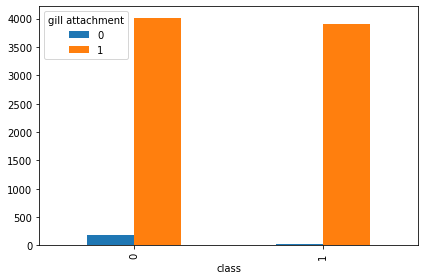

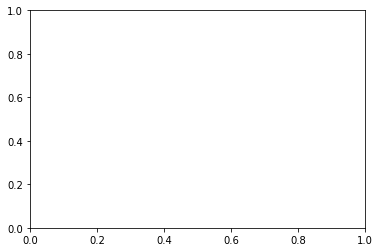

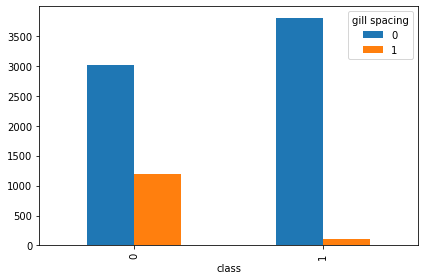

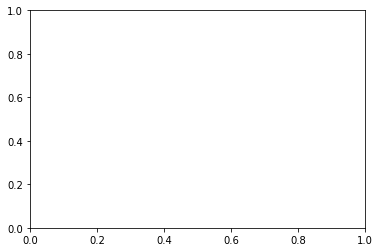

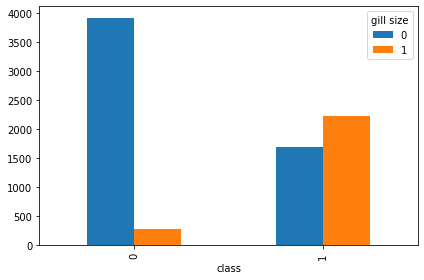

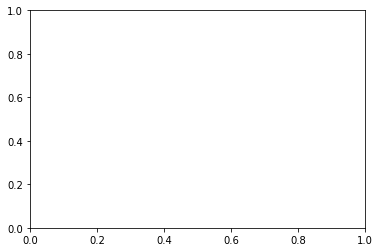

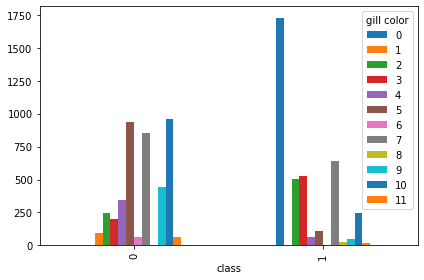

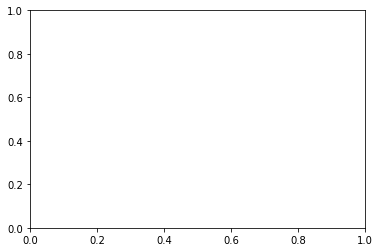

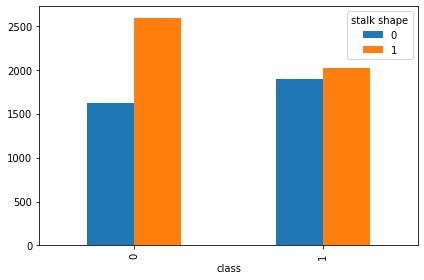

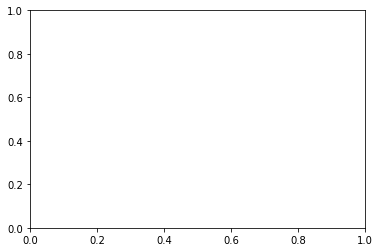

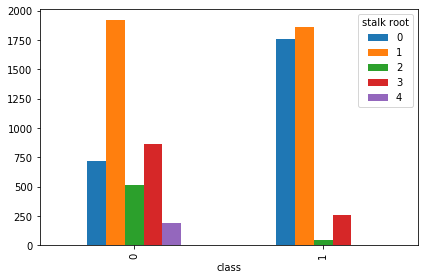

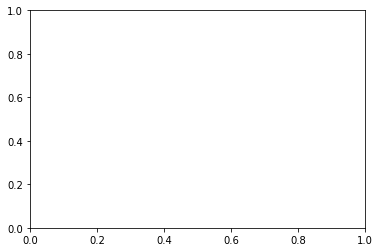

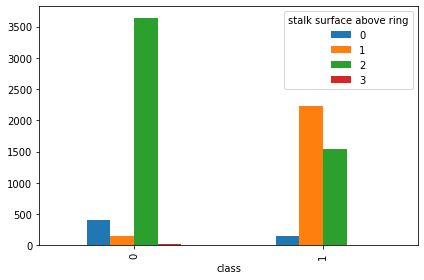

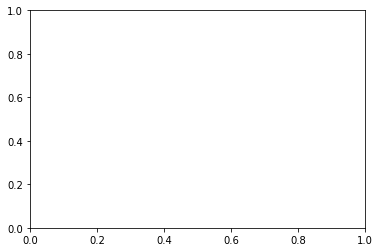

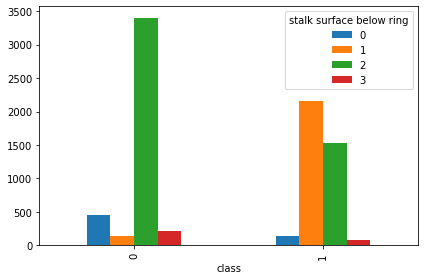

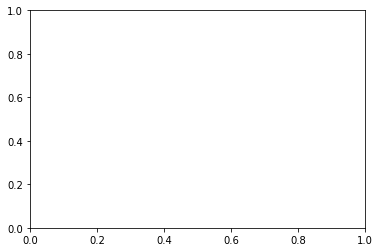

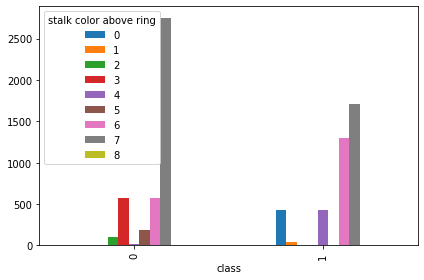

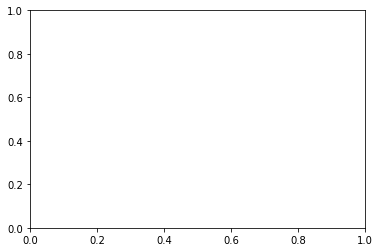

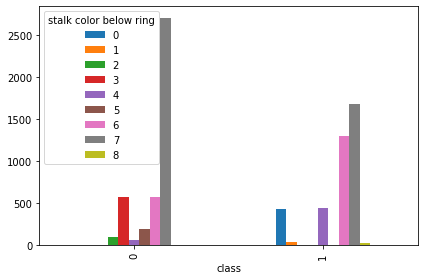

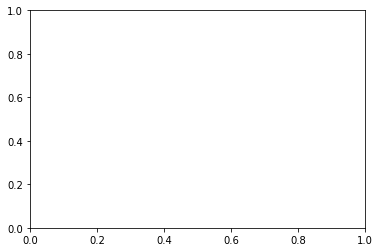

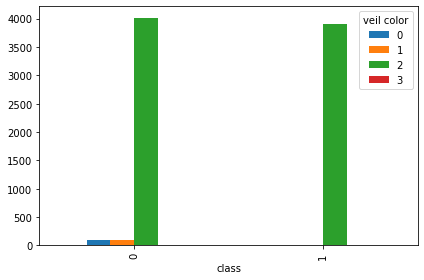

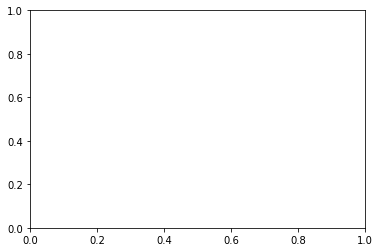

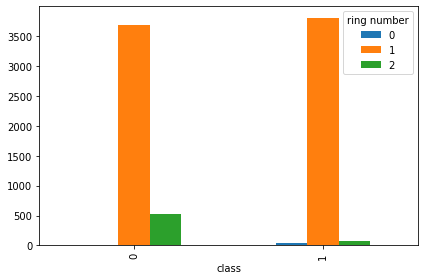

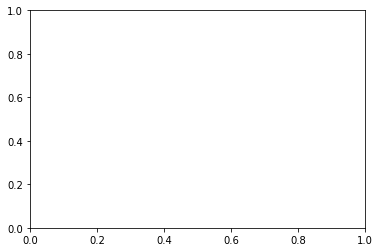

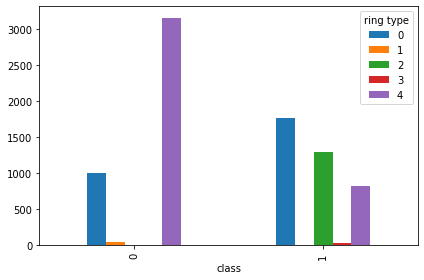

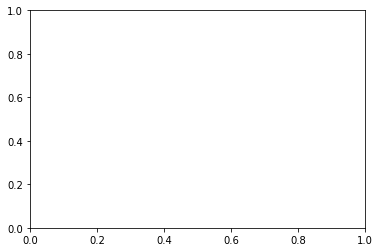

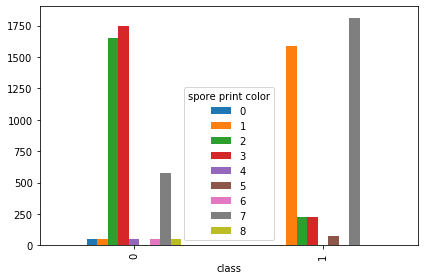

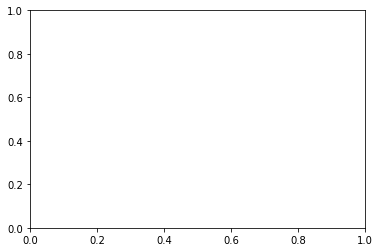

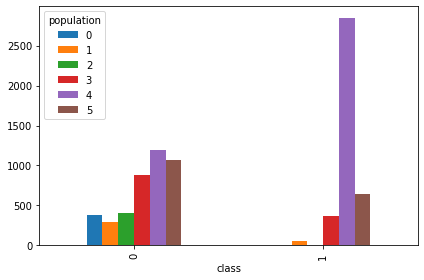

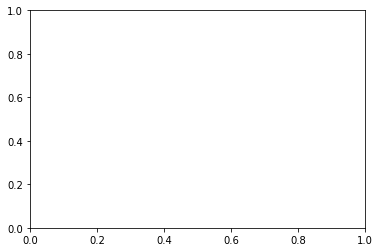

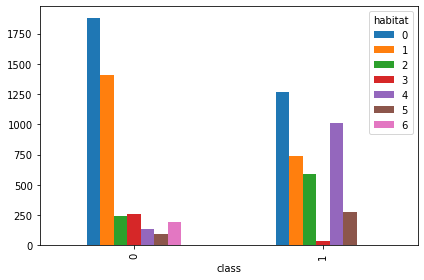

In [45]:
for i in range(len(col)):
    plt.subplots()
    pd.crosstab(mush['class'], mush[col[i]]).plot.bar()
    plt.tight_layout()
    plt.show()

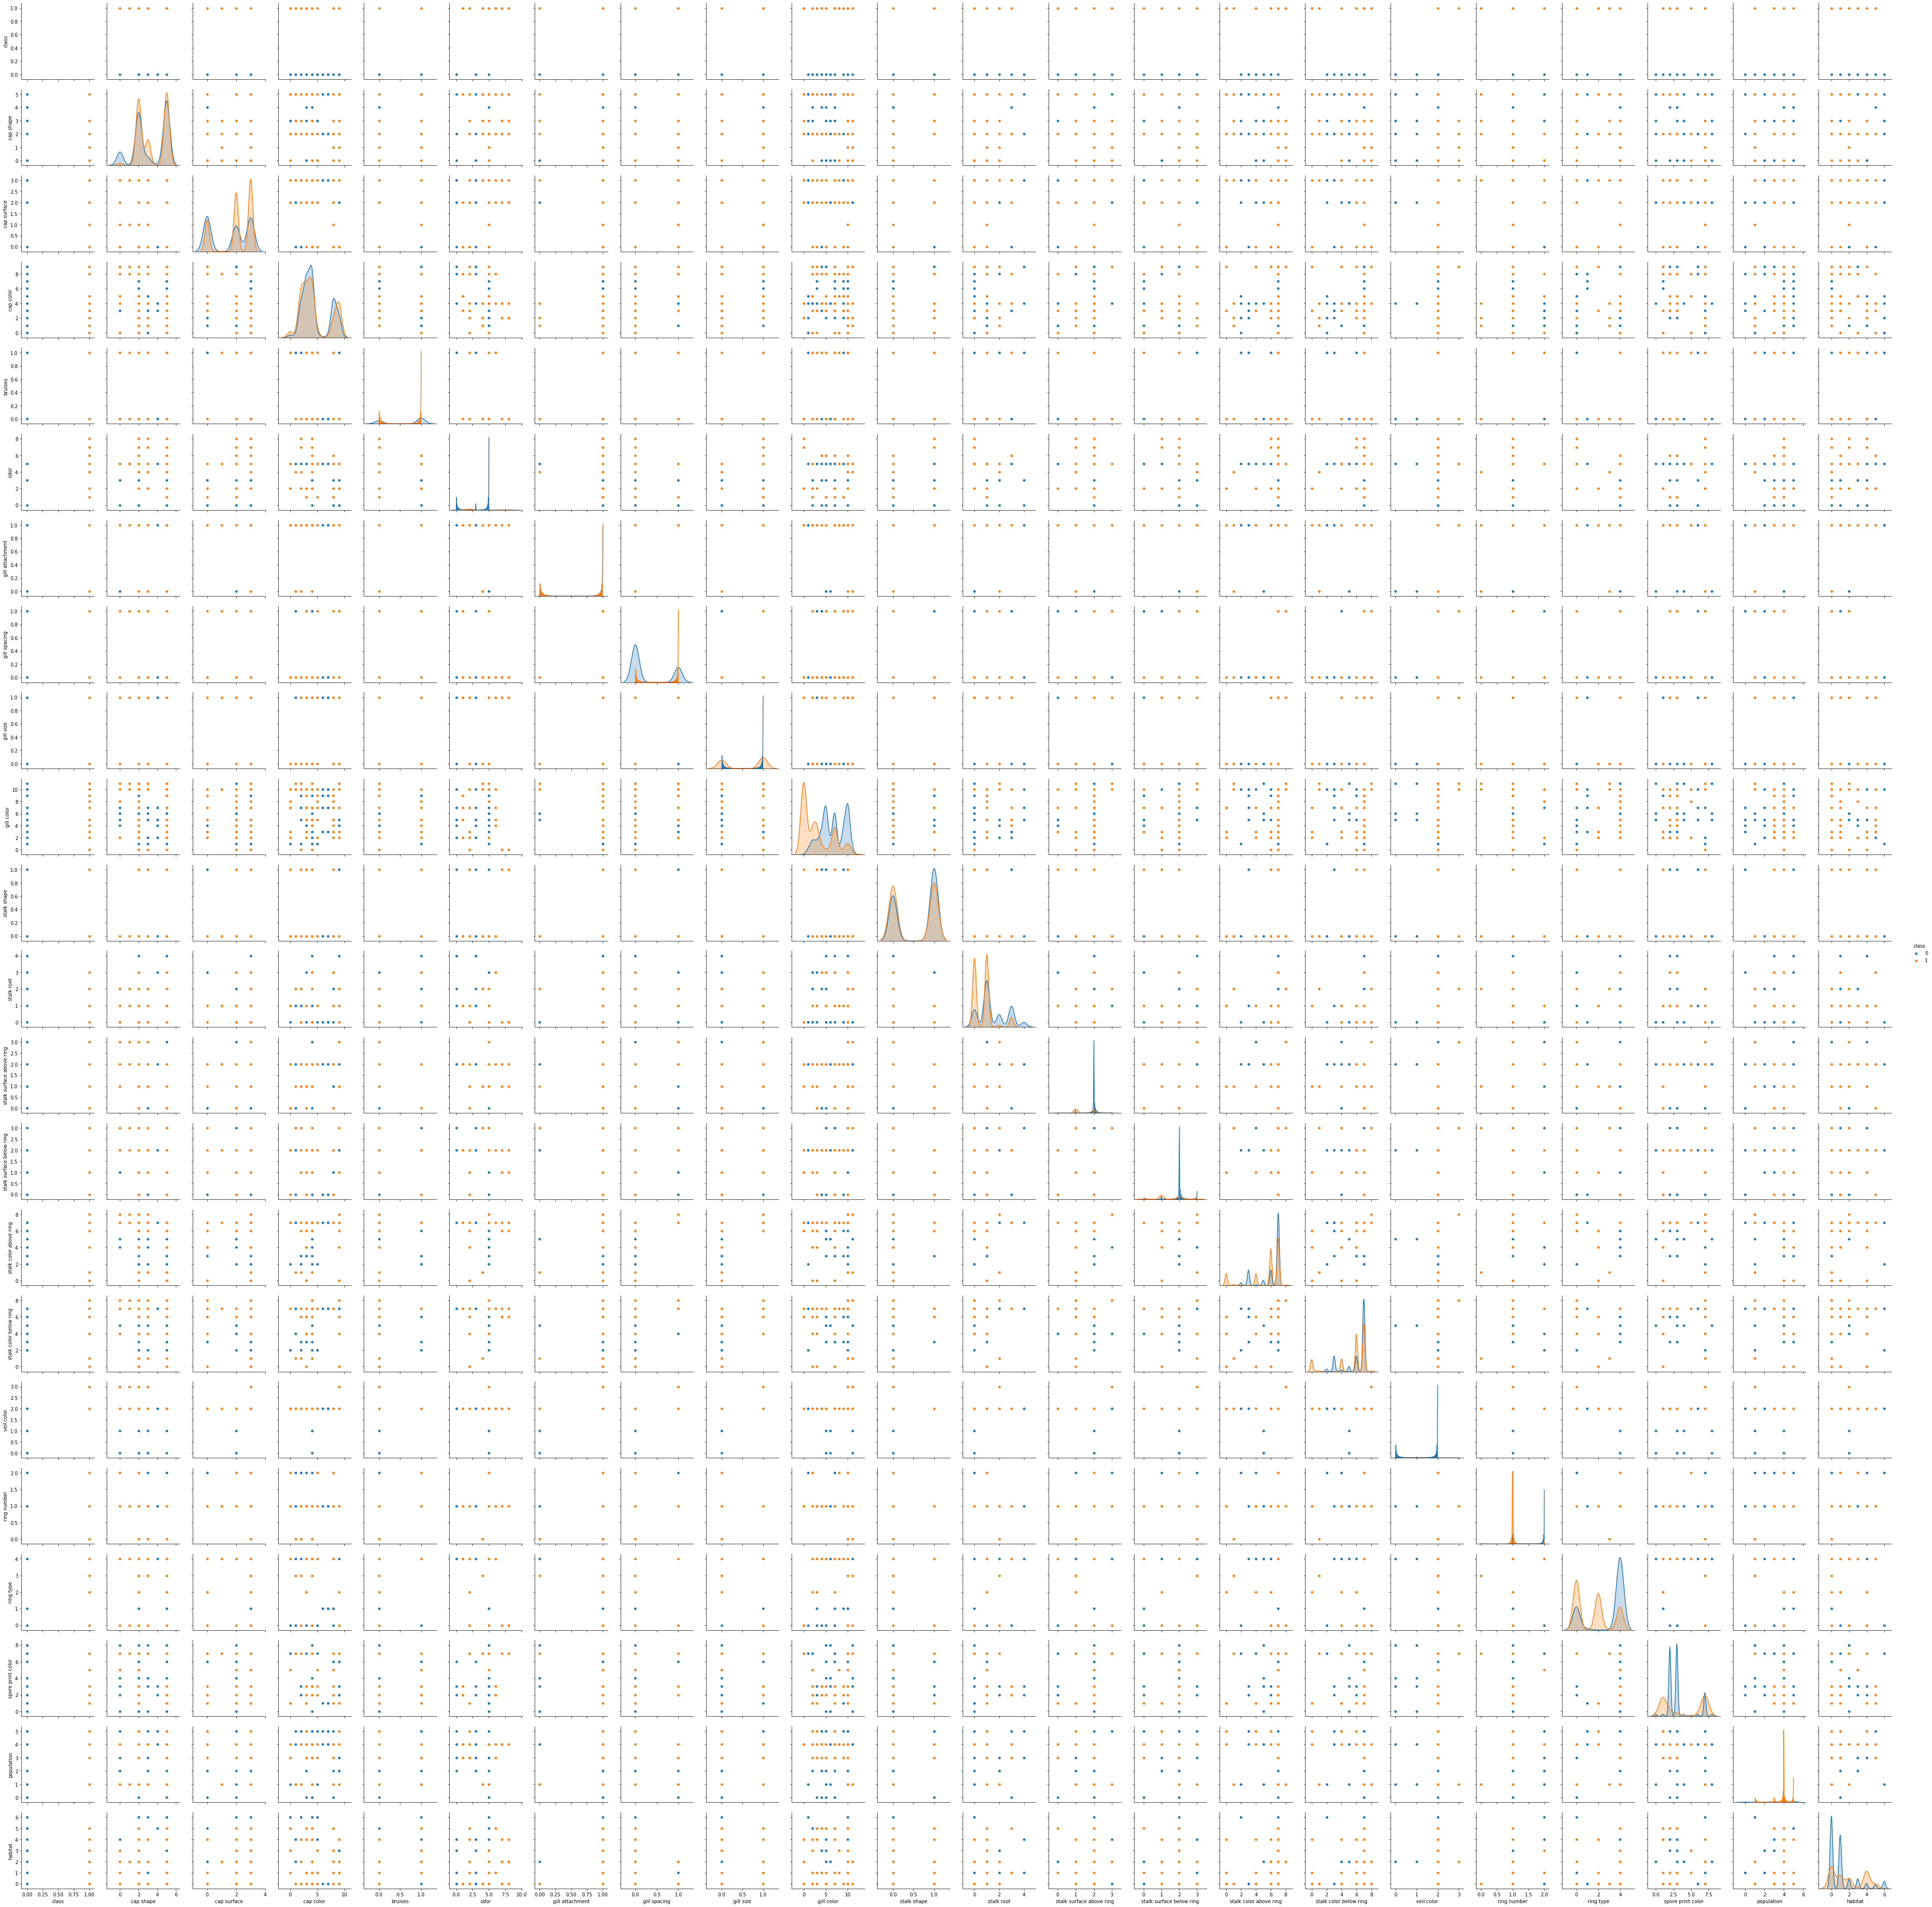

In [47]:
sns.pairplot(mush, hue='class')

In [48]:
mush.corr()

,class,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil color,ring number,ring type,spore print color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


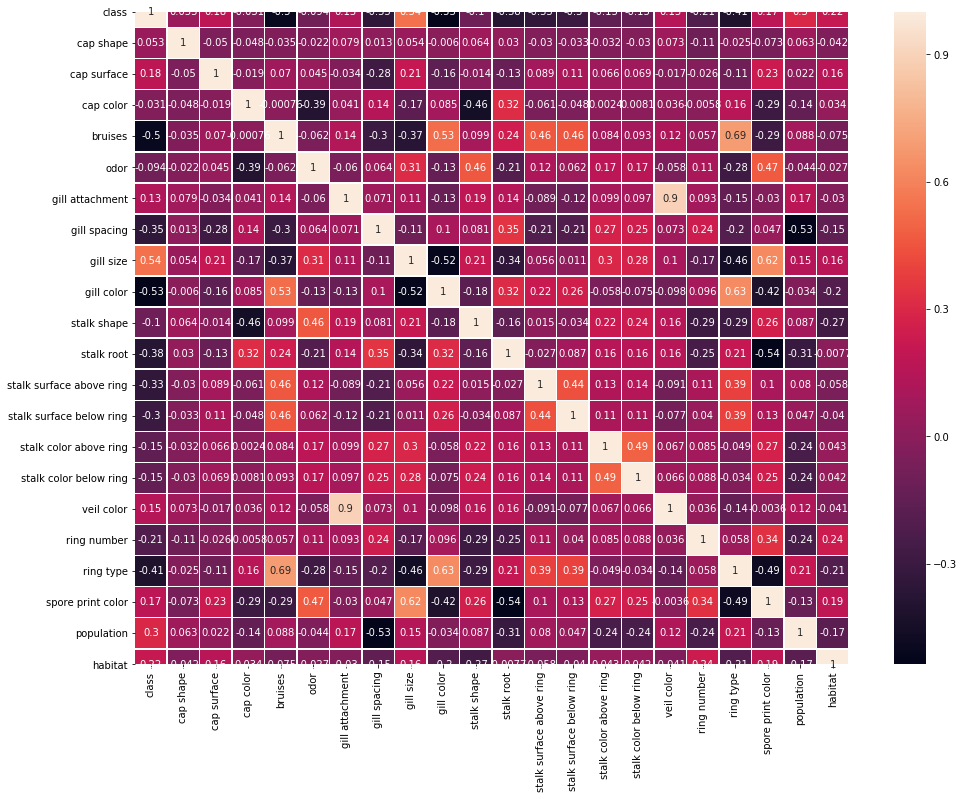

In [50]:
plt.figure(figsize=(16,12))
sns.heatmap(mush.corr(), annot=True, linewidths=0.5, square=False)

In [51]:
mush.skew()

class                       0.071946
cap shape                  -0.247052
cap surface                -0.590859
cap color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill attachment            -5.977076
gill spacing                1.840088
gill size                   0.825797
gill color                  0.061410
stalk shape                -0.271345
stalk root                  0.947852
stalk surface above ring   -1.098739
stalk surface below ring   -0.757703
stalk color above ring     -1.835434
stalk color below ring     -1.791593
veil color                 -6.946944
ring number                 2.701657
ring type                  -0.290018
spore print color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64